In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Car Price.csv')

In [4]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Analysis and Encoding

In [57]:
df.describe()

,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.498387,0.252535,0.103226,0.347465
std,4.215344,5.785487e+05,46644.102194,0.500055,0.434516,0.304289,0.476220
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,1.000000,1.000000,0.000000,1.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.corr()

,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
Year,1.000000,0.413922,-0.419688,-0.113202,0.173703,0.143800,-0.438897
Selling_Price,0.413922,1.000000,-0.192289,-0.276623,0.236798,0.530205,-0.223889
KM_Driven,-0.419688,-0.192289,1.000000,-0.290669,-0.182663,-0.120226,0.299731
Fuel,-0.113202,-0.276623,-0.290669,1.000000,-0.031006,-0.045859,-0.006356
Seller_Type,0.173703,0.236798,-0.182663,-0.031006,1.000000,0.214163,-0.252628
Transmission,0.143800,0.530205,-0.120226,-0.045859,0.214163,1.000000,-0.090121
Owner,-0.438897,-0.223889,0.299731,-0.006356,-0.252628,-0.090121,1.000000


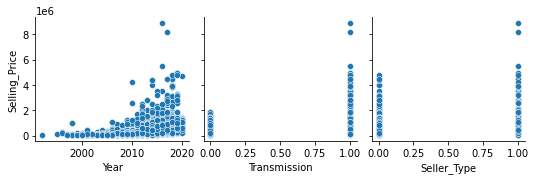

In [37]:
sns.pairplot(df, y_vars = 'Selling_Price',x_vars = ['Year','Transmission','Seller_Type'])

In [15]:
df['Seller_Type'].value_counts()

0    3244
1    1096
Name: Seller_Type, dtype: int64

In [16]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':1}},inplace=True)

In [17]:
df['Transmission'].value_counts()

0    3892
1     448
Name: Transmission, dtype: int64

In [18]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [19]:
df['Owner'].value_counts()

0    2832
1    1508
Name: Owner, dtype: int64

In [20]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':1,'Fourth & Above Owner':1,'Test Drive Car':1}},inplace=True)

In [21]:
df['Fuel'].value_counts()


Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [23]:
df.replace({'Fuel':{'Diesel':0,'Petrol':1,'CNG':1,'LPG':0,'Electric':0}},inplace=True)

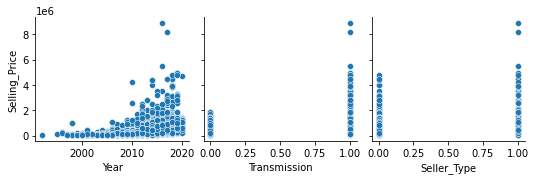

In [73]:
sns.pairplot(df, y_vars = 'Selling_Price',x_vars = ['Year','Transmission','Seller_Type'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   int64 
 6   Seller_Type    4340 non-null   int64 
 7   Transmission   4340 non-null   int64 
 8   Owner          4340 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 305.3+ KB


# Defining dependent and independent varible

In [25]:
y=df['Selling_Price']

In [27]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: Selling_Price, dtype: int64

In [29]:
X=df.drop(['Brand','Model','Selling_Price'],axis=1)

In [30]:
X.shape,y.shape

((4340, 6), (4340,))

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

In [34]:
X_train.describe()

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2013.059579,65967.416722,0.507571,0.253127,0.104016,0.351218
std,4.220394,45603.611814,0.500025,0.434875,0.305331,0.477429
min,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,35000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,60000.000000,1.000000,0.000000,0.000000,0.000000
75%,2016.000000,90000.000000,1.000000,1.000000,0.000000,1.000000
max,2020.000000,560000.000000,1.000000,1.000000,1.000000,1.000000


# Scaling data

In [39]:
from sklearn.preprocessing import StandardScaler 

In [40]:
ss = StandardScaler()

In [41]:
X_train = ss.fit_transform(X_train)

In [42]:
X_test = ss.fit_transform(X_test)

In [47]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03
mean,2.495553e-14,1.871080e-17,-2.806620e-17,-4.677701e-17,1.929552e-17,7.484321e-17
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00
min,-4.990777e+00,-1.446756e+00,-1.015258e+00,-5.821648e-01,-3.407215e-01,-7.357646e-01
25%,-4.880866e-01,-6.791680e-01,-1.015258e+00,-5.821648e-01,-3.407215e-01,-7.357646e-01
50%,2.228645e-01,-1.308756e-01,9.849714e-01,-5.821648e-01,-3.407215e-01,-7.357646e-01
75%,6.968319e-01,5.270753e-01,9.849714e-01,1.717727e+00,-3.407215e-01,1.359130e+00
max,1.644767e+00,1.083497e+01,9.849714e-01,1.717727e+00,2.934949e+00,1.359130e+00


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(degree =2,interaction_only=True,include_bias=False)

In [50]:
X_train2 = poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

# Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
lr.intercept_

495800.41968399886

In [58]:
y_pred = lr.predict(X_test)

In [59]:
lr.fit(X_train2,y_train)

LinearRegression()

In [60]:
lr.intercept_

415522.50592202874

In [61]:
y_pred2 = lr.predict(X_test2)

# Checking Model Accuracy

In [64]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [67]:
mean_absolute_error(y_test,y_pred)


243197.56844338472

In [68]:
mean_absolute_error(y_test,y_pred2)

208856.36982286238

In [69]:
mean_absolute_percentage_error(y_test,y_pred)

0.7184667497799061

In [70]:
mean_absolute_percentage_error(y_test,y_pred2)

0.5286577460090682

In [71]:
r2_score(y_test,y_pred)

0.4026677455254867

In [72]:
r2_score(y_test,y_pred2)

0.4943173966945408